# Importing libraries

In [6]:
import torch

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Loading the dataset

In [8]:
df = pd.read_csv('AI_Human.csv')
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [9]:
df.tail()

,text,generated
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0
487234,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0.0


# Data Preprocessing 

In [10]:
df.shape

(487235, 2)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

text         0
generated    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [14]:
df['generated'] = df['generated'].astype(int)
df.nunique()

text         487235
generated         2
dtype: int64

In [16]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
df['generated'].unique()


generated
0    305797
1    181438
Name: count, dtype: int64

In [17]:
df['generated'].value_counts()

generated
0    305797
1    181438
Name: count, dtype: int64

# Data Visualization

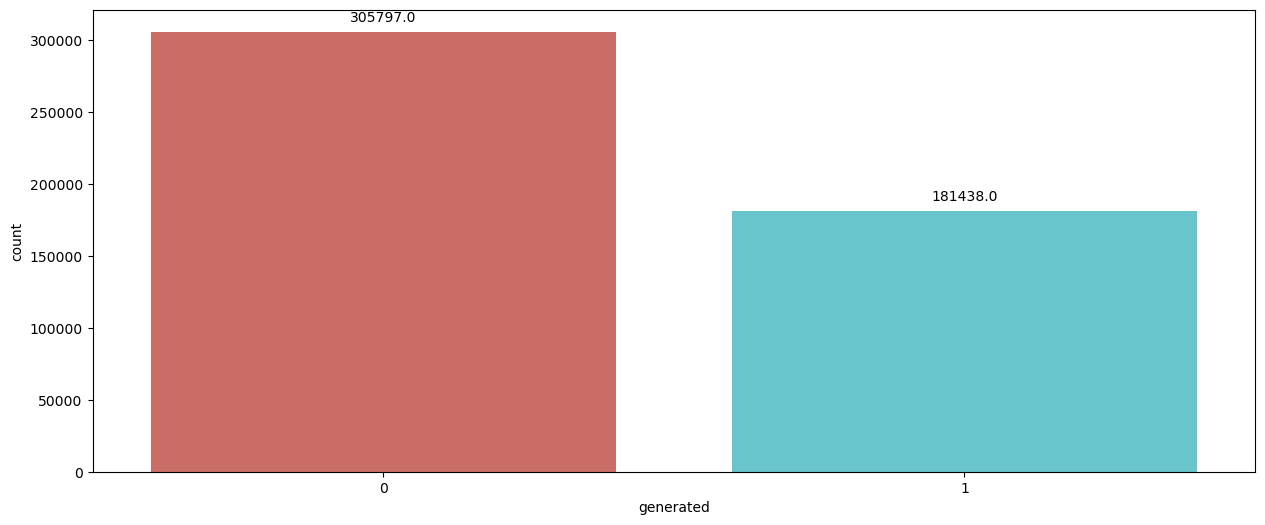

In [18]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df['generated'], data=df, palette='hls')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

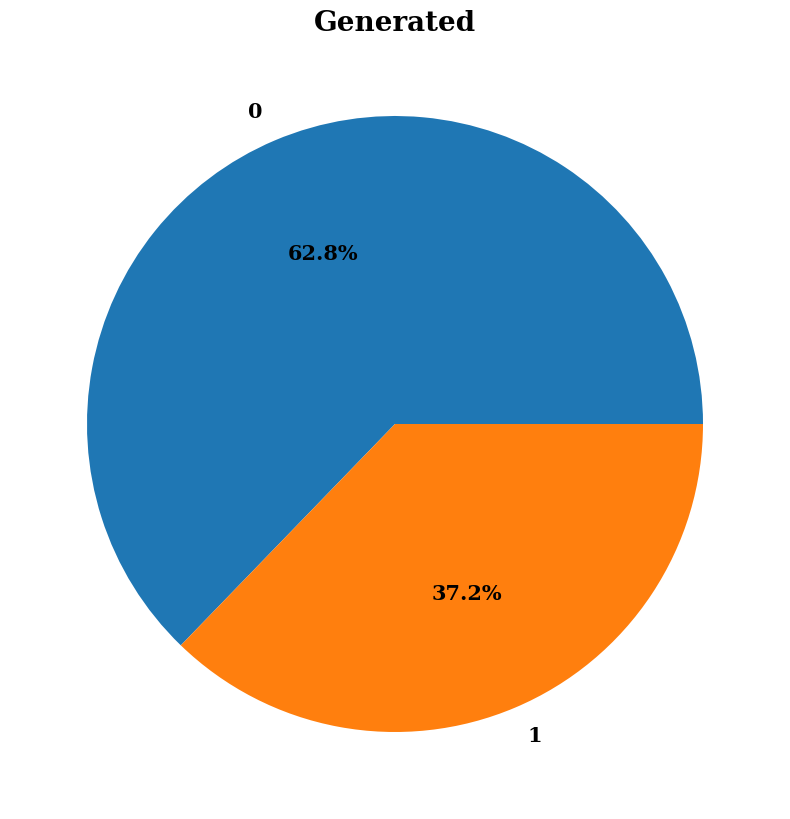

In [19]:
plt.figure(figsize=(20,10)) 
plt.pie(df['generated'].value_counts(), labels=df['generated'].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Generated', size=20, **hfont) 
plt.show()


In [20]:
df_zeros = df[df['generated'] == 0].head(10000)
df_ones = df[df['generated'] == 1].head(10000)
new_df = pd.concat([df_zeros, df_ones], ignore_index=True)
new_df

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
19995,The use of renewable energy sources is an impo...,1
19996,High school sports are often a source of pride...,1
19997,The beauty of nature can be seen in the cycle ...,1
19998,The impact of air pollution on human health is...,1


# Word Cloud

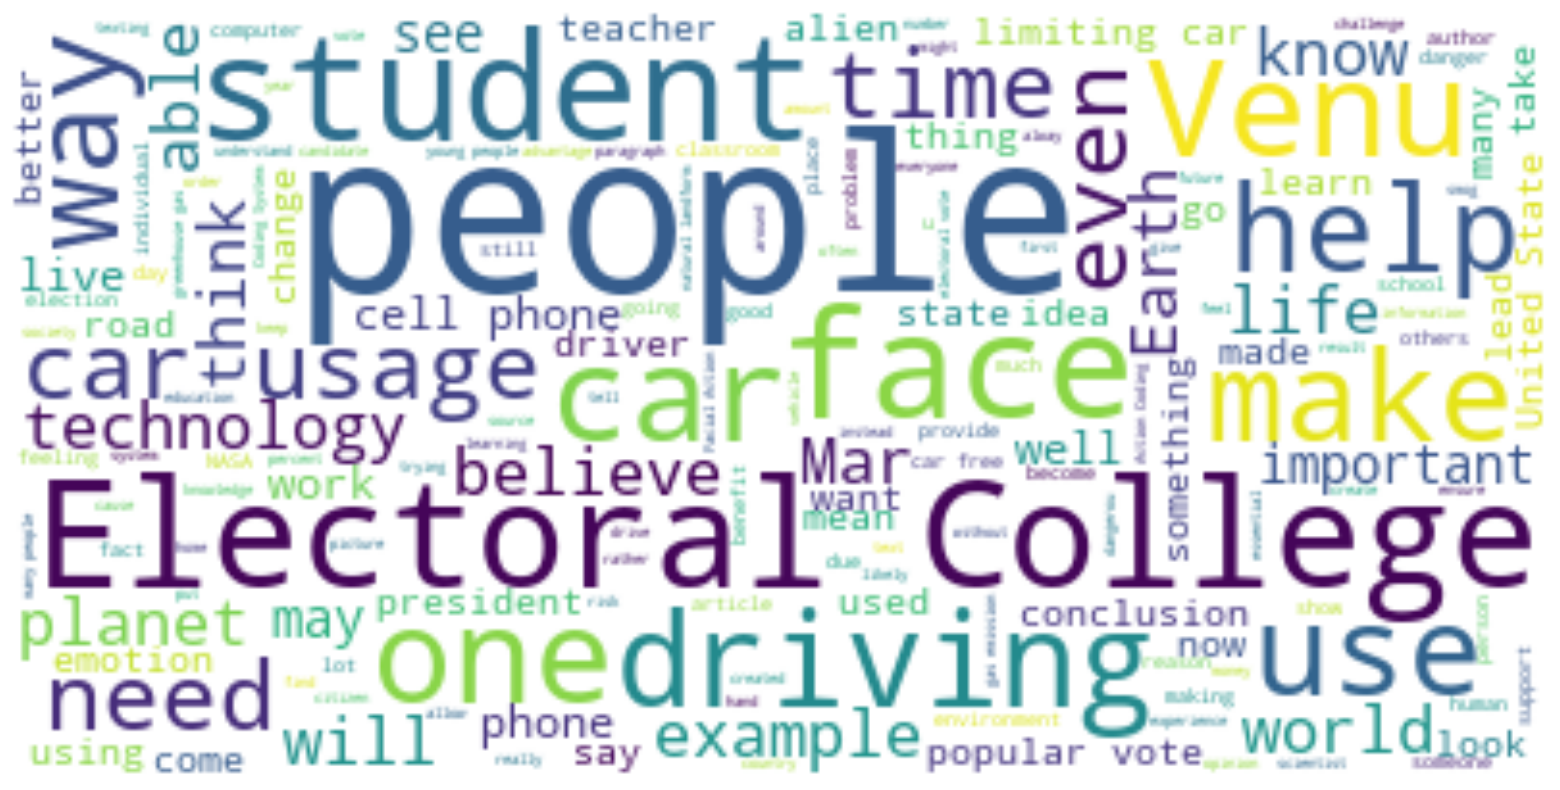

In [21]:
df_new = new_df.copy()
from wordcloud import WordCloud
text_data = ' '.join(df_new['text'])
wordcloud = WordCloud(background_color='white').generate(text_data)
fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.show()

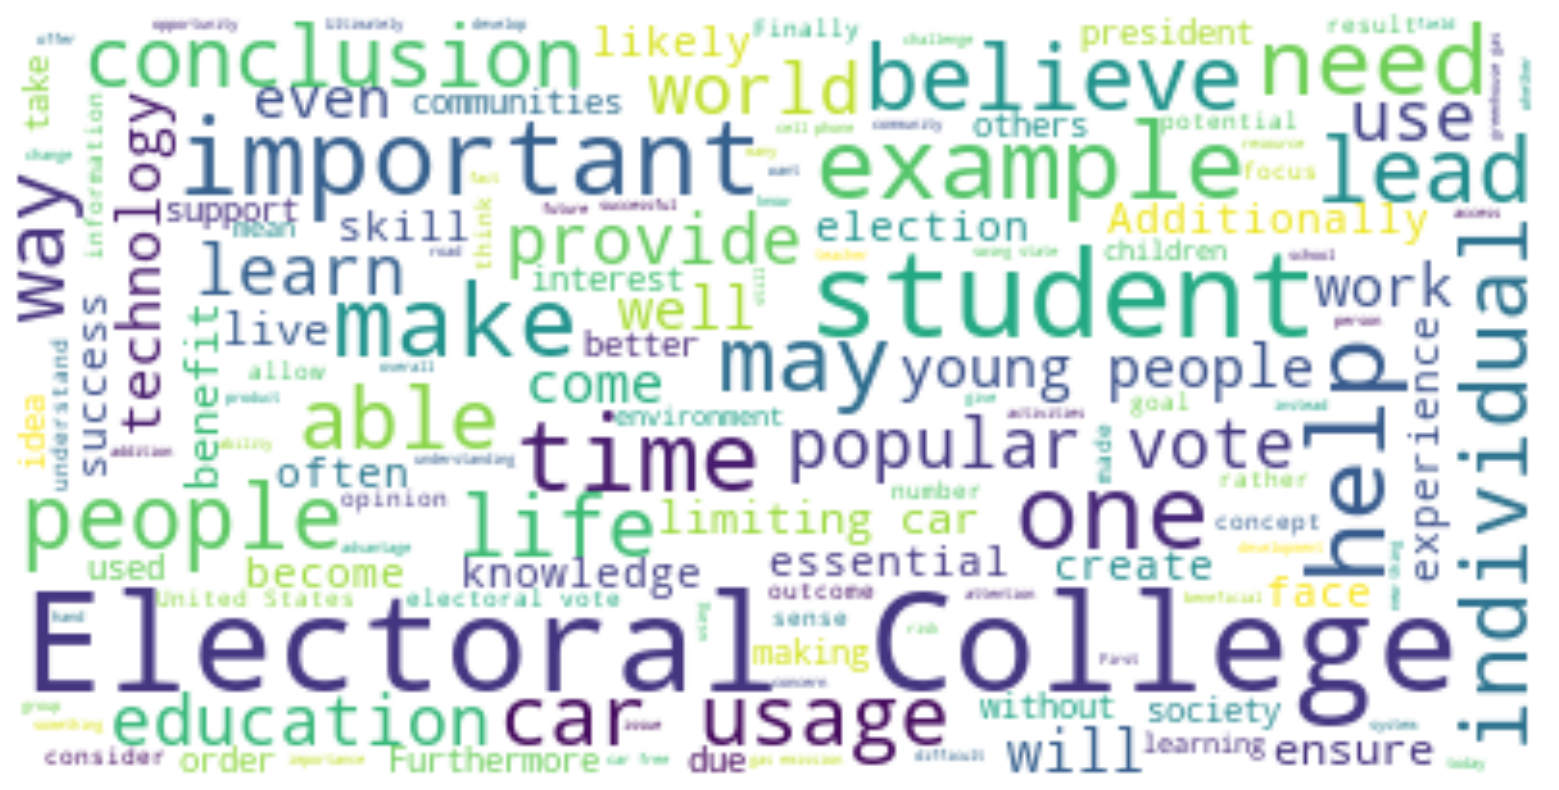

In [22]:
ai_text_data = ' '.join(df_new[df_new['generated'] == 1]['text'])

if ai_text_data:
    wordcloud = WordCloud(background_color='white').generate(ai_text_data)

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No AI text data to generate a word cloud.')

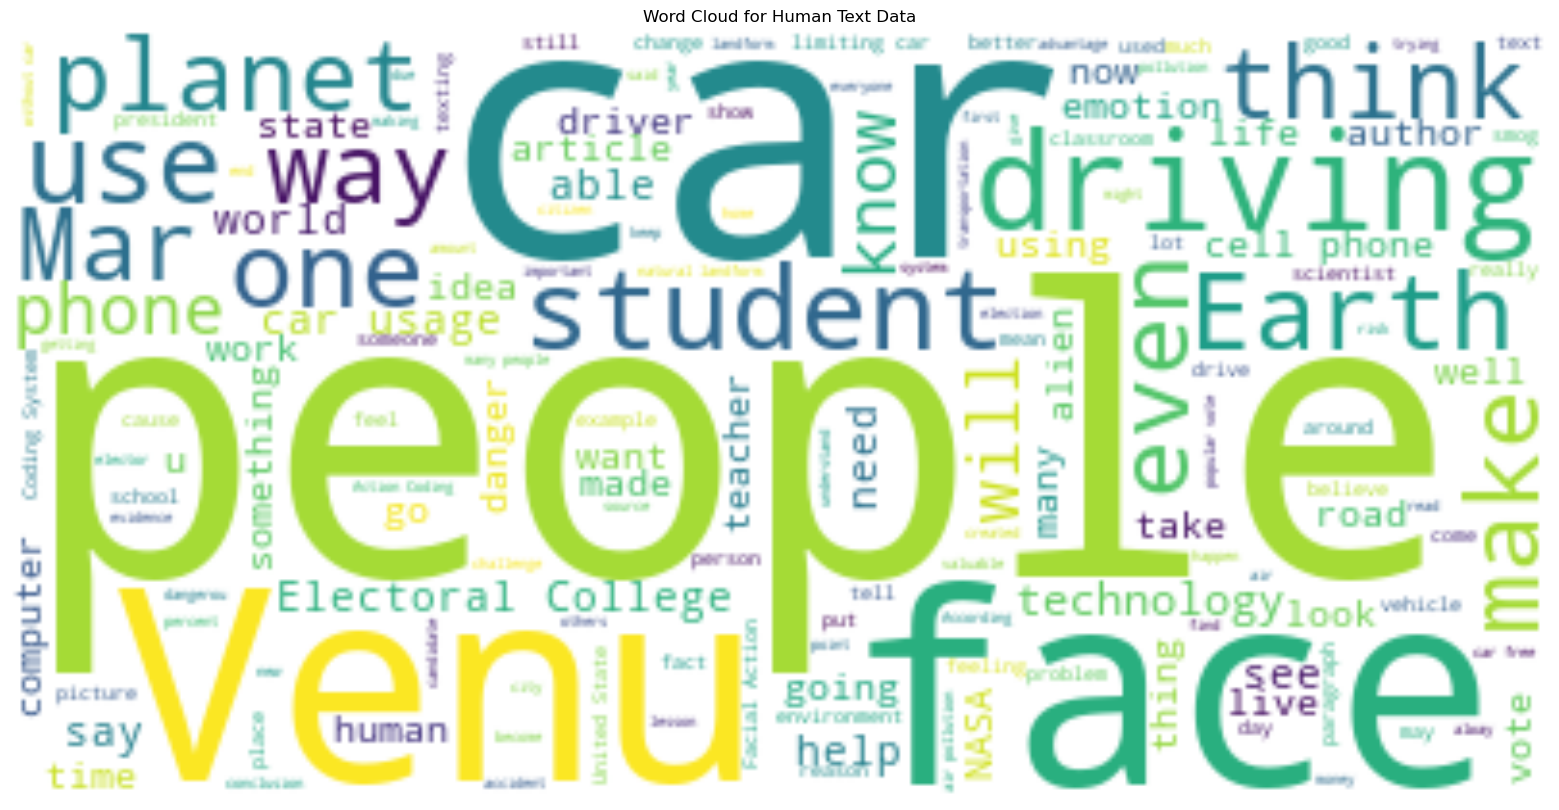

In [23]:
human_text_data = ' '.join(df_new[df_new['generated'] == 0]['text'])

if human_text_data:
    wordcloud_human = WordCloud(background_color='white').generate(human_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud_human, interpolation='bilinear')
    ax.axis('off')
    plt.title('Word Cloud for Human Text Data')
    plt.show()
else:
    print('No human text data to generate a word cloud.')

In [24]:
df_new['text_length'] = df_new['text'].apply(len)
df_new

,text,generated,text_length
0,Cars. Cars have been around since they became ...,0,3289
1,Transportation is a large necessity in most co...,0,2738
2,"""America's love affair with it's vehicles seem...",0,4428
3,How often do you ride in a car? Do you drive a...,0,4013
4,Cars are a wonderful thing. They are perhaps o...,0,4698
...,...,...,...
19995,The use of renewable energy sources is an impo...,1,1993
19996,High school sports are often a source of pride...,1,2139
19997,The beauty of nature can be seen in the cycle ...,1,2053
19998,The impact of air pollution on human health is...,1,2352


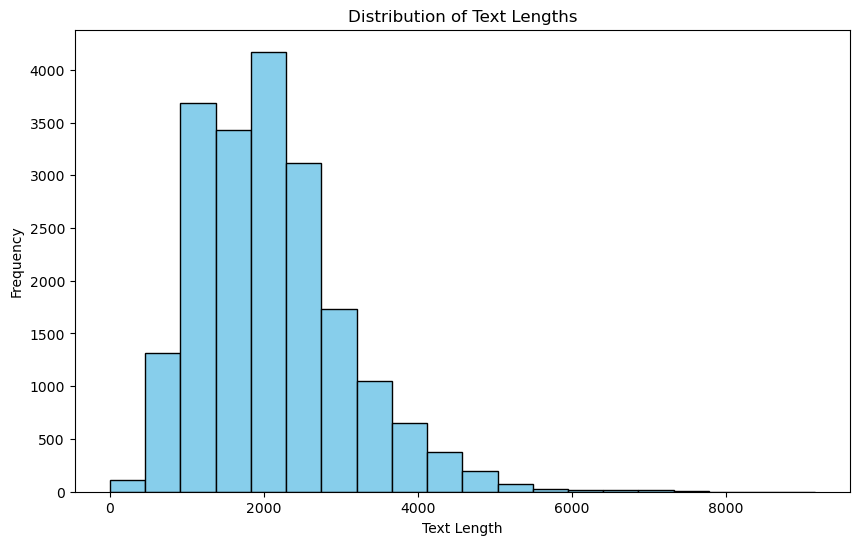

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df_new['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

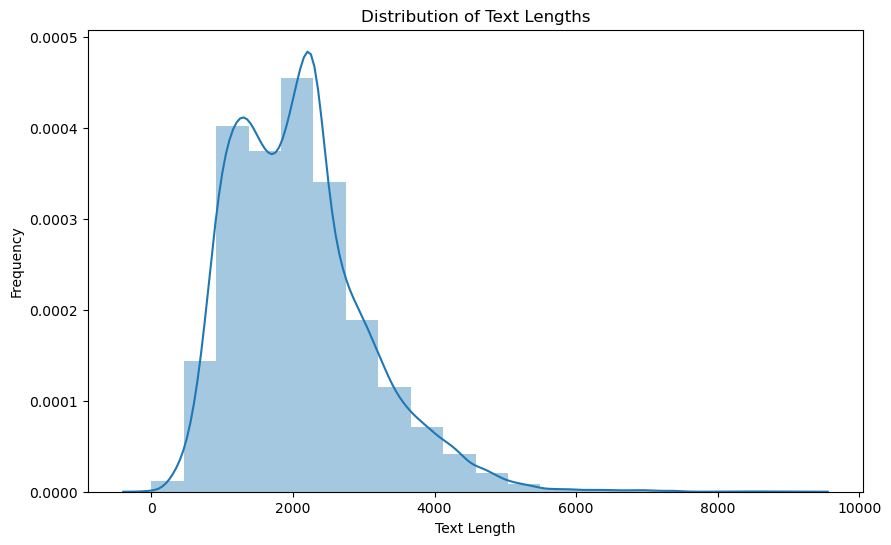

In [26]:
plt.figure(figsize=(10, 6))
sns.distplot(df_new['text_length'], bins=20, kde = True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


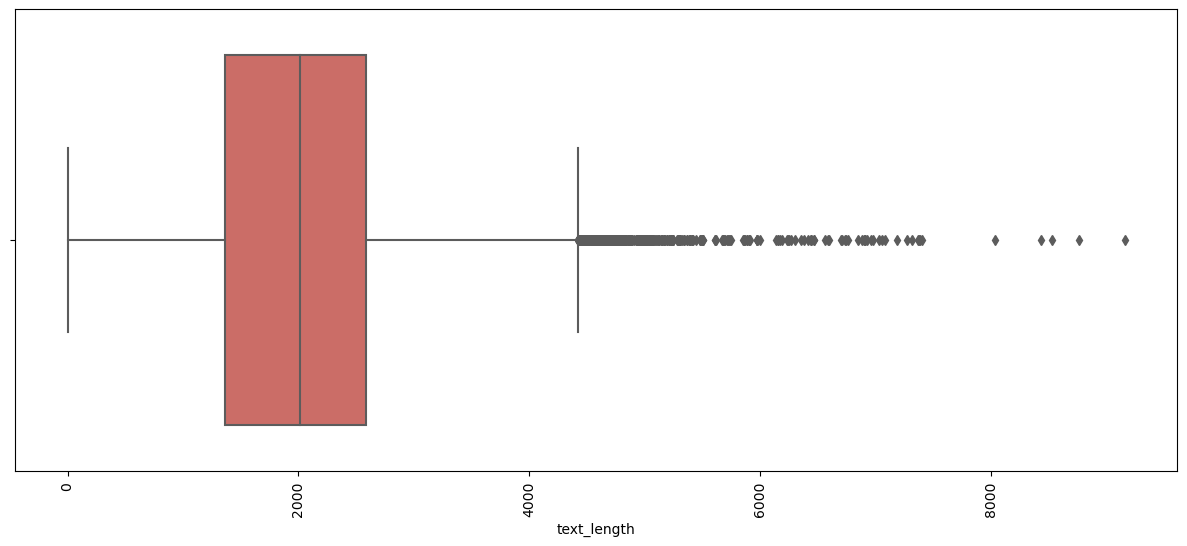

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(x = df_new['text_length'], data = df_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

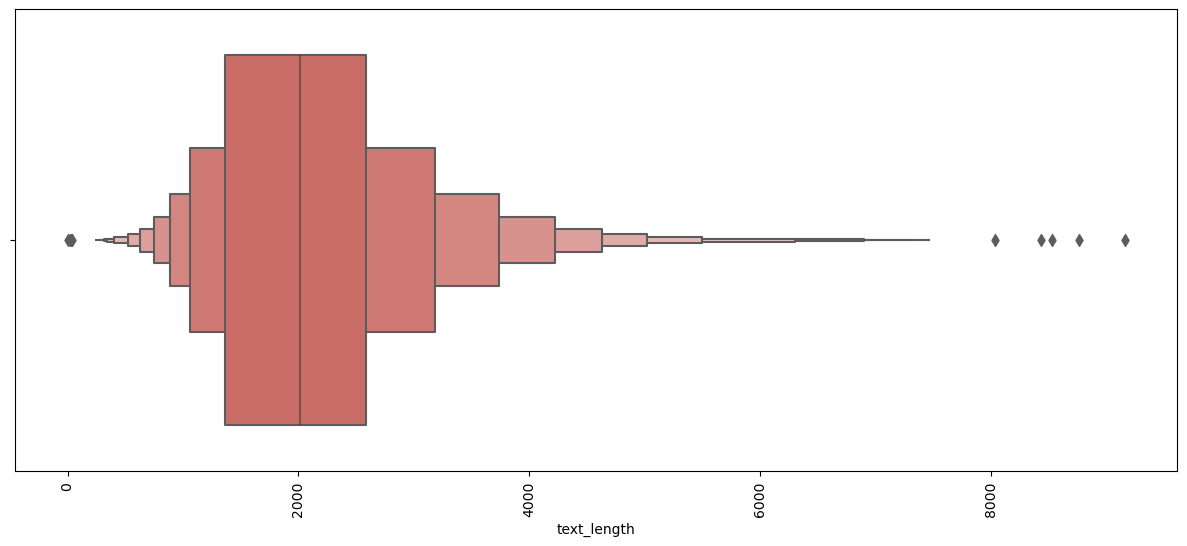

In [28]:
plt.figure(figsize=(15,6))
sns.boxenplot(x = df_new['text_length'], data = df_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Human vs Ai generated text

In [29]:
human_lengths = df_new[df_new['generated'] == 0]['text_length']
ai_lengths = df_new[df_new['generated'] == 1]['text_length']

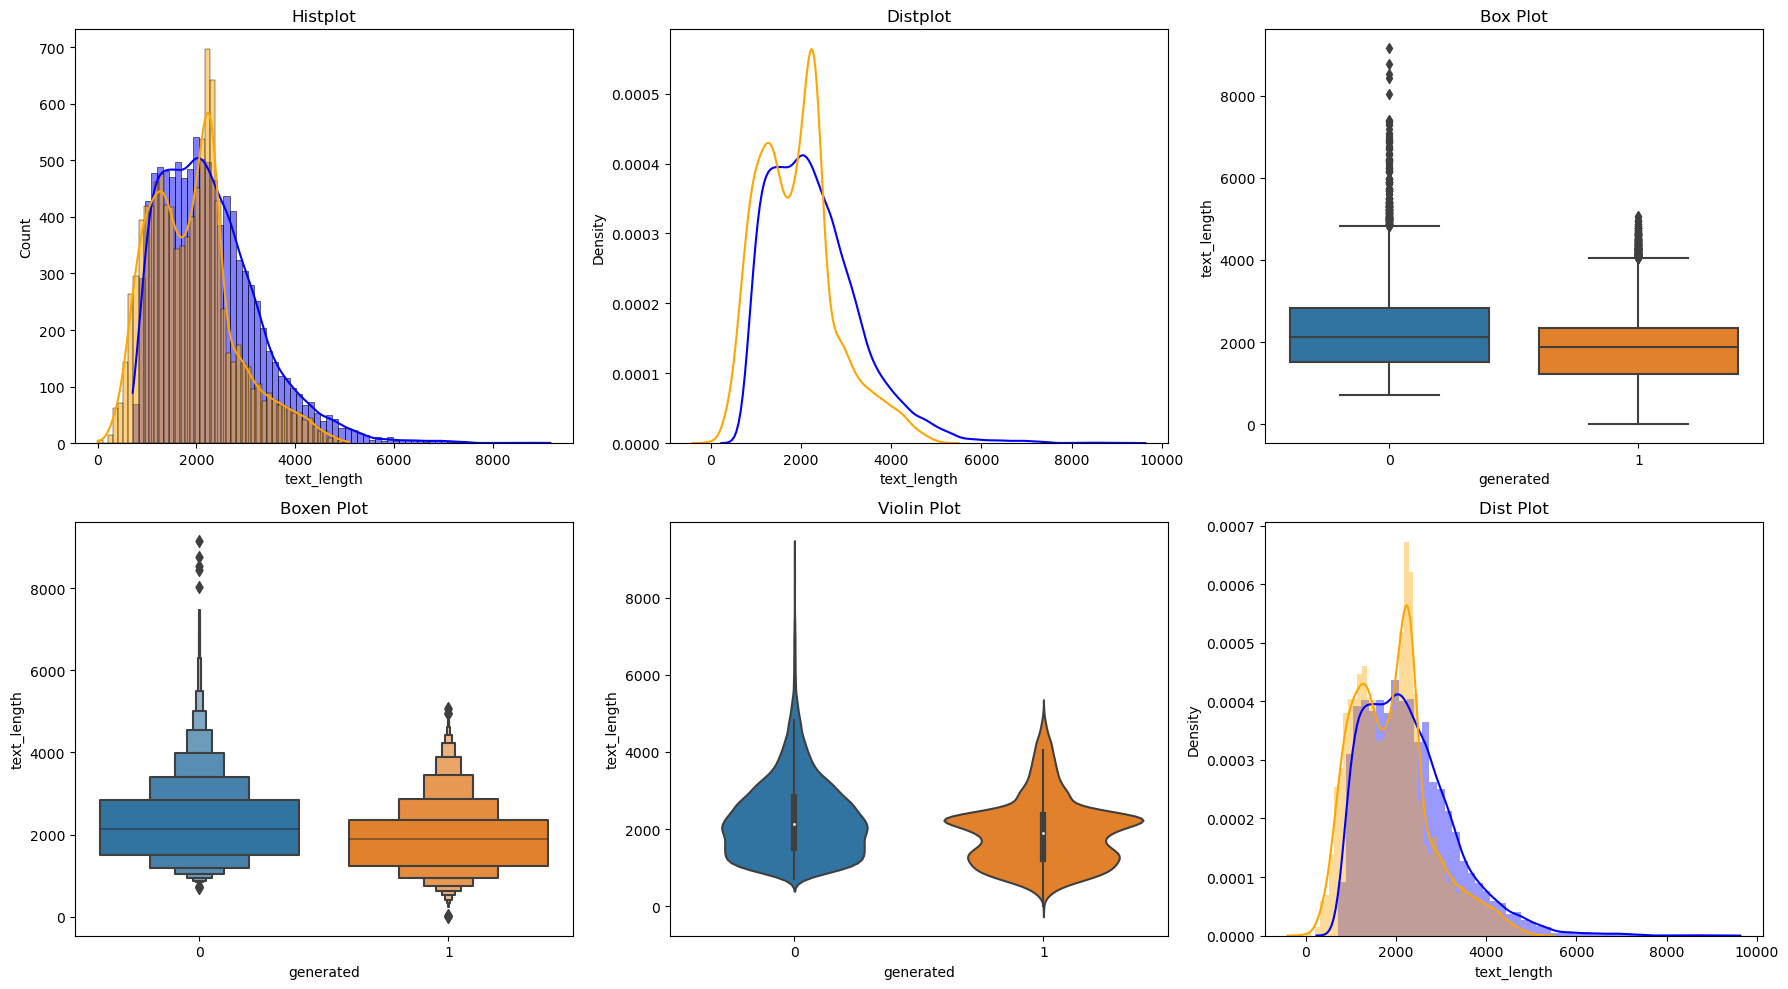

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

sns.histplot(human_lengths, kde=True, color='blue', label='Human', ax=axes[0, 0])
sns.histplot(ai_lengths, kde=True, color='orange', label='AI', ax=axes[0, 0])
axes[0, 0].set_title('Histplot')

sns.kdeplot(human_lengths, color='blue', label='Human', ax=axes[0, 1])
sns.kdeplot(ai_lengths, color='orange', label='AI', ax=axes[0, 1])
axes[0, 1].set_title('Distplot')

sns.boxplot(x='generated', y='text_length', data=df_new, ax=axes[0, 2])
axes[0, 2].set_title('Box Plot')

sns.boxenplot(x='generated', y='text_length', data=df_new, ax=axes[1, 0])
axes[1, 0].set_title('Boxen Plot')

sns.violinplot(x='generated', y='text_length', data=df_new, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot')

sns.distplot(human_lengths, kde=True, color='blue', label='Human', ax=axes[1, 2])
sns.distplot(ai_lengths, kde=True, color='orange', label='AI', ax=axes[1, 2])
axes[1, 2].set_title('Dist Plot')

plt.tight_layout()
plt.show()


In [32]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora

In [33]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora
texts = [['apple', 'orange', 'banana'], ['banana', 'kiwi', 'orange', 'grape']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.284*"banana" + 0.283*"orange" + 0.276*"apple" + 0.079*"kiwi" + 0.078*"grape"')
(1, '0.230*"banana" + 0.220*"orange" + 0.216*"grape" + 0.186*"kiwi" + 0.147*"apple"')
(2, '0.238*"kiwi" + 0.235*"orange" + 0.228*"banana" + 0.224*"grape" + 0.075*"apple"')


In [34]:
human_texts = df_new[df_new['generated'] == 0]['text']
ai_texts = df_new[df_new['generated'] == 1]['text']
human_tokens = [text.split() for text in human_texts]
ai_tokens = [text.split() for text in ai_texts]
human_dictionary = Dictionary(human_tokens)
ai_dictionary = Dictionary(ai_tokens)
human_corpus = [human_dictionary.doc2bow(tokens) for tokens in human_tokens]
ai_corpus = [ai_dictionary.doc2bow(tokens) for tokens in ai_tokens]
num_topics = 5  
human_lda_model = LdaModel(human_corpus, num_topics=num_topics, id2word=human_dictionary, passes=5)
ai_lda_model = LdaModel(ai_corpus, num_topics=num_topics, id2word=ai_dictionary, passes=5)

In [35]:
print("Human-Generated Text Topics:")
for topic in human_lda_model.print_topics():
    print(topic)

print("\nAI-Generated Text Topics:")
for topic in ai_lda_model.print_topics():
    print(topic)

Human-Generated Text Topics:
(0, '0.055*"the" + 0.035*"a" + 0.025*"that" + 0.021*"it" + 0.021*"of" + 0.020*"is" + 0.019*"was" + 0.016*"to" + 0.016*"on" + 0.012*"and"')
(1, '0.067*"the" + 0.026*"of" + 0.023*"to" + 0.019*"a" + 0.016*"is" + 0.015*"in" + 0.015*"and" + 0.014*"for" + 0.014*"that" + 0.013*"vote"')
(2, '0.038*"the" + 0.032*"to" + 0.025*"a" + 0.023*"and" + 0.018*"is" + 0.015*"of" + 0.015*"that" + 0.014*"in" + 0.014*"be" + 0.013*"can"')
(3, '0.048*"the" + 0.038*"to" + 0.025*"and" + 0.023*"of" + 0.023*"is" + 0.021*"that" + 0.017*"a" + 0.017*"Venus" + 0.014*"it" + 0.013*"on"')
(4, '0.043*"the" + 0.034*"to" + 0.029*"of" + 0.026*"and" + 0.025*"a" + 0.018*"in" + 0.013*"is" + 0.013*"car" + 0.011*"that" + 0.011*"are"')

AI-Generated Text Topics:
(0, '0.040*"the" + 0.036*"and" + 0.034*"of" + 0.026*"to" + 0.024*"in" + 0.019*"a" + 0.013*"cars" + 0.013*"car" + 0.012*"are" + 0.012*"more"')
(1, '0.080*"the" + 0.038*"of" + 0.027*"a" + 0.026*"to" + 0.023*"and" + 0.019*"Electoral" + 0.017*"in" 

In [36]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [37]:
human_combined_text = ' '.join(human_texts)
ai_combined_text = ' '.join(ai_texts)
human_tokens = word_tokenize(human_combined_text.lower())
ai_tokens = word_tokenize(ai_combined_text.lower())
stop_words = set(stopwords.words('english') + list(string.punctuation))
human_tokens = [word for word in human_tokens if word not in stop_words]
ai_tokens = [word for word in ai_tokens if word not in stop_words]
human_freq_dist = FreqDist(human_tokens)
ai_freq_dist = FreqDist(ai_tokens)

# Common Words Generated by Human and Ai

In [38]:
print("Most common words in Human-Generated Texts:")
print(human_freq_dist.most_common(10))

print("\nMost common words in AI-Generated Texts:")
print(ai_freq_dist.most_common(10))

Most common words in Human-Generated Texts:
[('people', 28020), ("''", 25392), ('``', 24521), ('would', 23037), ('venus', 22605), ('car', 21654), ('cars', 18758), ('driving', 17627), ("'s", 17243), ('could', 16908)]

Most common words in AI-Generated Texts:
[('people', 16226), ('electoral', 11425), ('students', 11152), ('also', 11142), ('college', 10661), ("'s", 10540), ('may', 9891), ('one', 9524), ('important', 8316), ('states', 8183)]


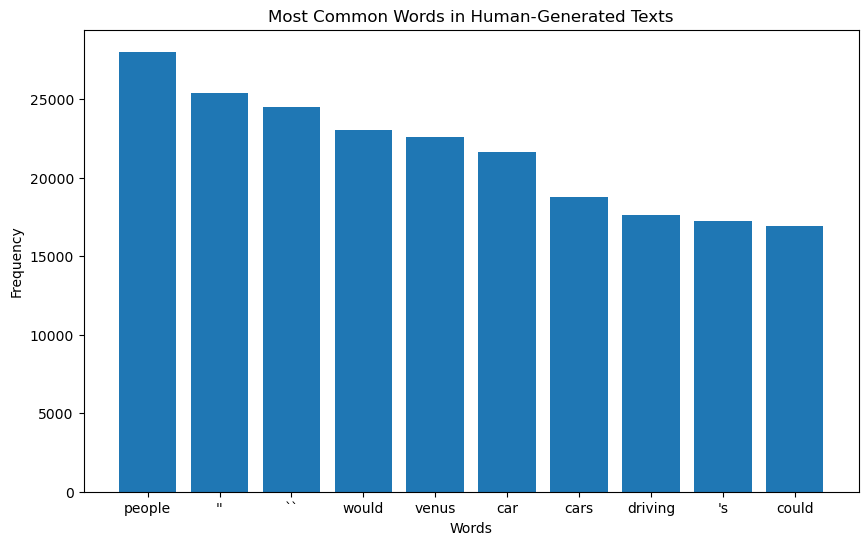

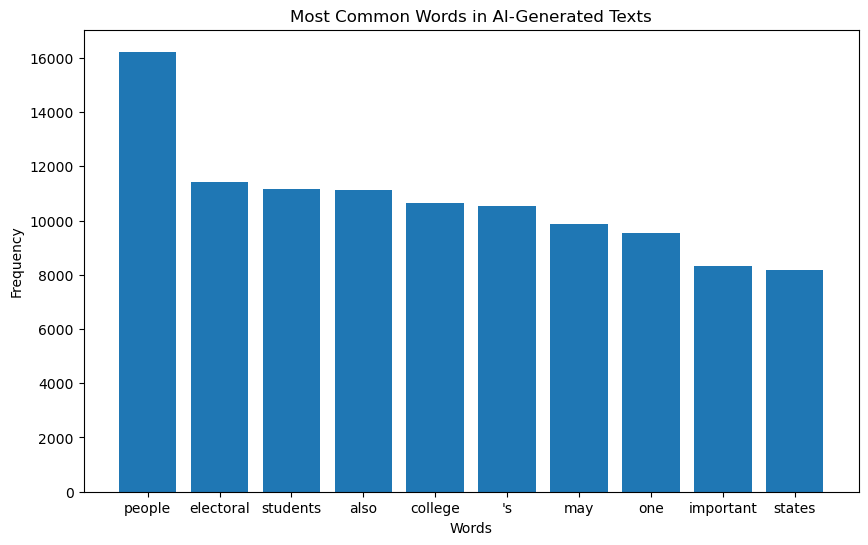

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(*zip(*human_freq_dist.most_common(10)))
plt.title('Most Common Words in Human-Generated Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ai_freq_dist.most_common(10)))
plt.title('Most Common Words in AI-Generated Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [40]:
human_unique_terms = set(human_tokens)
ai_unique_terms = set(ai_tokens)
print("\nUnique terms in Human-Generated Texts:")
print(list(human_unique_terms)[:10])

print("\nUnique terms in AI-Generated Texts:")
print(list(ai_unique_terms)[:10])


Unique terms in Human-Generated Texts:
['intoxicating', 'higher', 'n-youre-hands-free-71833', 'expesses', 'decayed', 'diffiuclt', 'compurters', 'corrosice', 'certainally', 'climbing']

Unique terms in AI-Generated Texts:
['engenders', 'higher', 'knowledge—the', 'climbing', 'renewable', 'diplomat', 'allocation/diversification', 'requirements/instructions', 'quality-of-life', 'labradors']


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training and testing

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
feature_names = tfidf_vectorizer.get_feature_names_out()
doc_ids = [f"Doc_{i+1}" for i in range(len(documents))]
import pandas as pd
df_tfidf = pd.DataFrame(data=tfidf_matrix.toarray(), index=doc_ids, columns=feature_names)
print(df_tfidf)

            and  document     first        is       one    second       the  \
Doc_1  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   
Doc_2  0.000000  0.687624  0.000000  0.281089  0.000000  0.538648  0.281089   
Doc_3  0.511849  0.000000  0.000000  0.267104  0.511849  0.000000  0.267104   
Doc_4  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   

          third      this  
Doc_1  0.000000  0.384085  
Doc_2  0.000000  0.281089  
Doc_3  0.511849  0.267104  
Doc_4  0.000000  0.384085  


In [43]:
X = df_new['text']  
y = df_new['generated']

In [44]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)



In [70]:

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify = y, 
                                                    random_state=42)


In [69]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.99075


# Model Evaluation

In [47]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9907854592494307
Recall: 0.99075
F1 Score: 0.9907498329188571


In [48]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.99075
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2000
           1       0.99      0.99      0.99      2000

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

Confusion Matrix:
 [[1990   10]
 [  27 1973]]


In [51]:

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.93475


In [53]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.934750978189701
Recall: 0.93475
F1 Score: 0.9347499632968542


In [54]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.93475
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      2000
           1       0.93      0.94      0.93      2000

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000

Confusion Matrix:
 [[1868  132]
 [ 129 1871]]


In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [64]:
y_pred = rf_classifier.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.979287880824255
Recall: 0.97875
F1 Score: 0.9787440363737051


In [65]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.97875
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2000
           1       1.00      0.96      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

Confusion Matrix:
 [[1991    9]
 [  76 1924]]


# Model Comparision

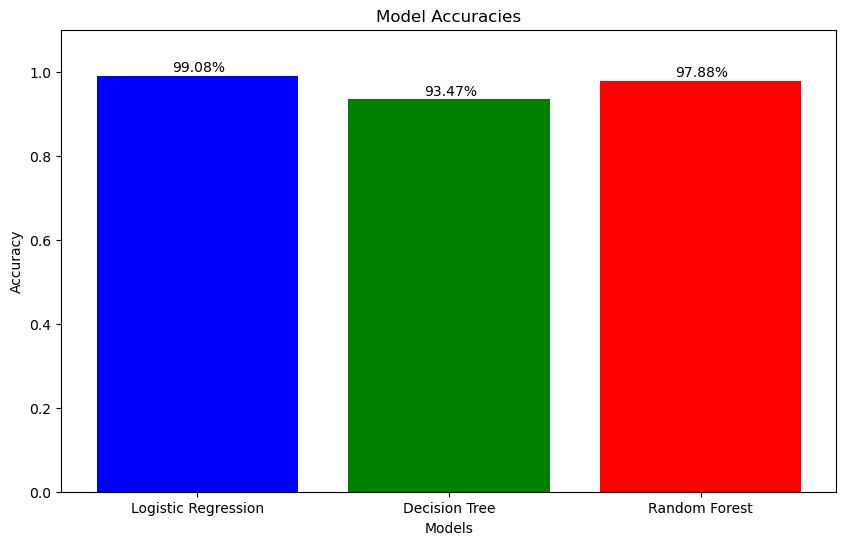

In [66]:
accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
}
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  

for bar, accuracy in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.2%}', fontsize=10)

plt.show()